In [17]:
import torch 
import torch.nn as nn
import numpy as np
import h5py
import torch.optim as optim

# Loading the training data
file_pathtr = "Data_sheet/train_cat.h5"
hf = h5py.File(file_pathtr, 'r')
X = np.array(hf['train_set_x'])                         # Image data
Y = np.array(hf['train_set_y'])                         # True Labels

# Converting  to PyTorch tensors
X_in = torch.tensor(X, dtype=torch.float32) 
Y_in = torch.tensor(Y, dtype=torch.float32)

# Reshape and normalize input
X_norm = X_in.reshape(X_in.shape[0], -1)               #Flattening the image
X_norm=X_norm/255.0
Y_in = Y_in.float().squeeze()                          #converting to float and removing the extra dimension(1) by squeezing 

# Defining the Neural Network Model
class BC_NN(nn.Module):
    def __init__(self):
        super(BC_NN, self).__init__()
        self.hidden_layers = nn.Sequential(       #The each image is of 64 by 64 pixels with three layers of R,G and B making (64,64,3) dim
            nn.Linear(12288, 50), nn.ReLU(),      #The flattened image is of dim (64*64*3)
            nn.Linear(50, 50), nn.ReLU(),
            nn.Linear(50, 1),
            nn.Sigmoid()                         # Apply sigmoid to get the values to be in between 0 to 1
        )

    def forward(self, x):                        #Forward Propagation
        return self.hidden_layers(x)

model =BC_NN()

# Define loss and optimizer
loss_fn = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)  # lr=learning_rate

# Training Process 
epochs = 50
for epoch in range(epochs):
    optimizer.zero_grad()                       # Reset gradients
    y_hat = model(X_norm).squeeze()             # Forward Propagation and squeezing the dimension from (209,1) to (209)
    cost = loss_fn(y_hat, Y_in)                 # Compute loss
    cost.backward()                             # Backpropagation
    optimizer.step()                            # Update weights

    if epoch % 10 == 0:
        print(f"Epoch {epoch}: Loss = {cost.item():.6f}")



Epoch 0: Loss = 0.681592
Epoch 10: Loss = 0.675690
Epoch 20: Loss = 0.671573
Epoch 30: Loss = 0.669120
Epoch 40: Loss = 0.667440


Epoch 10: Loss = 0.664713
Epoch 20: Loss = 0.663497
Epoch 30: Loss = 0.662365
Epoch 40: Loss = 0.661281
Epoch 50: Loss = 0.660302


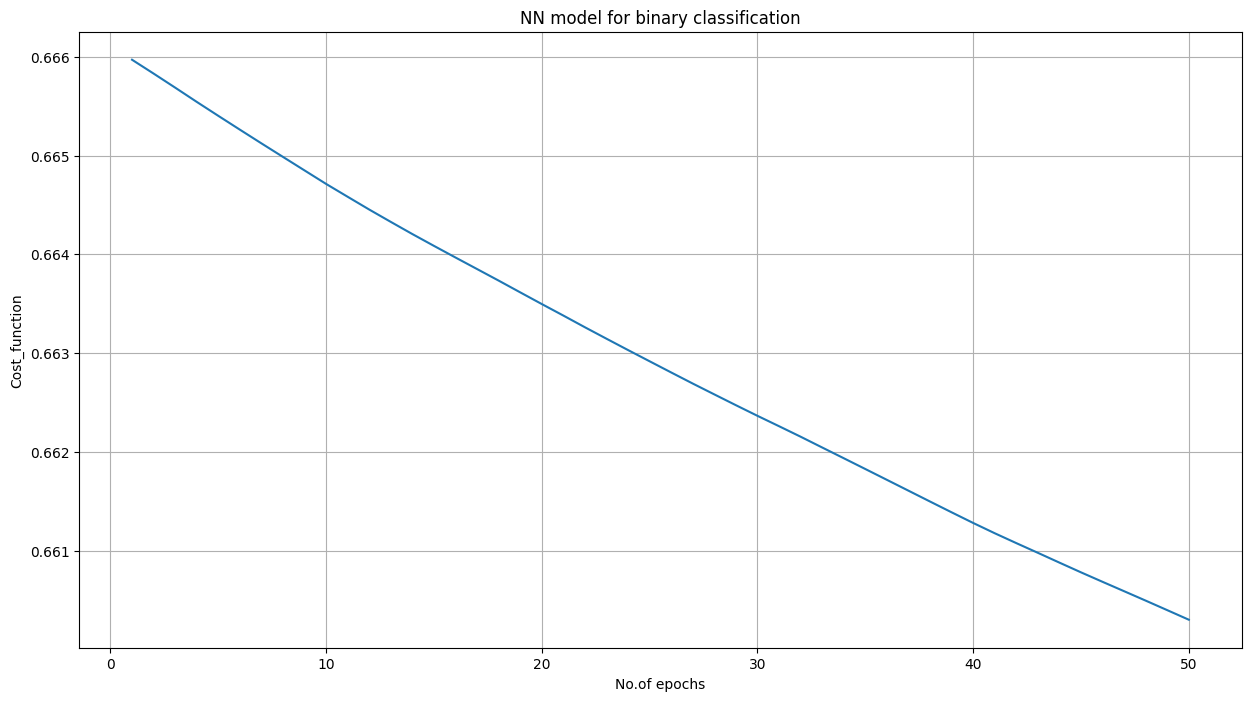

In [18]:
import matplotlib.pyplot as plt

#loading the test data
file_path="Data_sheet/test_cat.h5"
hf=h5py.File(file_path,'r')
X_test=np.array(hf['test_set_x'])
Y_test=np.array(hf['test_set_y'])
X_test=torch.tensor(X_test,dtype=torch.float32)
Y_test=torch.tensor(Y_test,dtype=torch.float32)
X_test=X_test.reshape(X_test.shape[0],-1)/255.0
Y_test=Y_test.float().squeeze()

Y_pred = model(X_test).detach().numpy().squeeze()
cost_list=[]
no_iter=[]
epochs = 50
for epoch in range(epochs):
    optimizer.zero_grad()  # Reset gradients
    y_hat = model(X_norm).squeeze()  # Forward pass
    cost = loss_fn(y_hat, Y_in)  # Compute loss
    cost_list.append(cost)
    epoch+=1
    no_iter.append(epoch)
    cost.backward()  # Backpropagation
    optimizer.step()  # Update weights

    if epoch % 10 == 0:
        print(f"Epoch {epoch}: Loss = {cost.item():.6f}")

cost_list=np.array([t.detach().numpy() for t in cost_list])

plt.figure(figsize=(15,8))
plt.plot(no_iter,cost_list)
plt.xlabel("No.of epochs")
plt.ylabel("Cost_function")
plt.title("NN model for binary classification")
plt.grid()
plt.show()